In [64]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,MinMaxScaler,PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings 
warnings.filterwarnings("ignore")

In [65]:
#importing the data
df=pd.read_csv("HR_analysis.csv")
df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

In [66]:
#checking shape of data
df.shape

(1470, 35)

In [67]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [69]:
#checking data types
df.dtypes 

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [70]:
#checking null values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [71]:
#checking all the given data.
df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

In [72]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [73]:
#counting unique values 
df["Attrition"].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [74]:
df["Department"].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [75]:
df["Education"].value_counts()

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

In [76]:
df["EnvironmentSatisfaction"].value_counts()

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64

In [77]:
df["Gender"].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [78]:
df["MaritalStatus"].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [79]:
df["JobSatisfaction"].value_counts()

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

In [80]:
df["JobLevel"].value_counts()

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64

In [81]:
df["JobInvolvement"].value_counts()

3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64

In [82]:
df["EducationField"].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [83]:
df["WorkLifeBalance"].value_counts()

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64

In [84]:
df["BusinessTravel"].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [85]:
df["Over18"].value_counts()

Y    1470
Name: Over18, dtype: int64

In [86]:
df["EmployeeCount"].value_counts()

1    1470
Name: EmployeeCount, dtype: int64

As there is only one value in employeenumber and employee counts and over18 lets drop them

In [87]:
#dropping the columns 
df.drop(["EmployeeCount","Over18","EmployeeNumber"],axis=1,inplace=True)

In [88]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  ...  RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0  Female  ...                         1             80                 0   
1    Male  ...                         4             80                 1   
2    Male  ...                         2             80                 0   
3  Female  ...                         3             80                 0   
4    Male  ...                         4             80                 1   

  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                 8                      0               1               6   
1                10                      3               3              10   
2                 7                      3               3               0   
3                 8                      3               3               8   
4                 6                      3               3               2   

   YearsInCurrentRole  YearsSinceLastPromotion YearsWithCurrManager  
0                   4                        0                    5  
1                   7                        1                    7  
2                   0                        0                    0  
3                   7                        3                    0  
4                   2                        2                    2  

[5 rows x 32 columns]

In [89]:
#making the data into numeric
l = LabelEncoder()
df['Attrition'] = l.fit_transform(df['Attrition'])
df

Age  Attrition     BusinessTravel  DailyRate              Department  \
0      41          1      Travel_Rarely       1102                   Sales   
1      49          0  Travel_Frequently        279  Research & Development   
2      37          1      Travel_Rarely       1373  Research & Development   
3      33          0  Travel_Frequently       1392  Research & Development   
4      27          0      Travel_Rarely        591  Research & Development   
...   ...        ...                ...        ...                     ...   
1465   36          0  Travel_Frequently        884  Research & Development   
1466   39          0      Travel_Rarely        613  Research & Development   
1467   27          0      Travel_Rarely        155  Research & Development   
1468   49          0  Travel_Frequently       1023                   Sales   
1469   34          0      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                    1          2  Life Sciences                        2   
1                    8          1  Life Sciences                        3   
2                    2          2          Other                        4   
3                    3          4  Life Sciences                        4   
4                    2          1        Medical                        1   
...                ...        ...            ...                      ...   
1465                23          2        Medical                        3   
1466                 6          1        Medical                        4   
1467                 4          3  Life Sciences                        2   
1468                 2          3        Medical                        4   
1469                 8          3        Medical                        2   

      Gender  ...  RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0     Female  ...                         1             80                 0   
1       Male  ...                         4             80                 1   
2       Male  ...                         2             80                 0   
3     Female  ...                         3             80                 0   
4       Male  ...                         4             80                 1   
...      ...  ...                       ...            ...               ...   
1465    Male  ...                         3             80                 1   
1466    Male  ...                         1             80                 1   
1467    Male  ...                         2             80                 1   
1468    Male  ...                         4             80                 0   
1469    Male  ...                         1             80                 0   

     TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                    8                      0               1               6   
1                   10                      3               3              10   
2                    7                      3               3               0   
3                    8                      3               3               8   
4                    6                      3               3               2   
...                ...                    ...             ...             ...   
1465                17                      3               3               5   
1466                 9                      5               3               7   
1467                 6                      0               3               6   
1468                17                      3               2               9   
1469                 6                      3               4               4   

      YearsInCurrentRole  YearsSinceLastPromotion YearsWithCurrManager  
0                      4                        0                    5  
1                      7                        1               

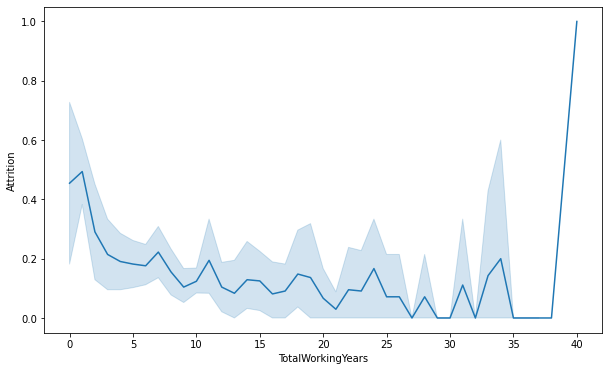

In [90]:
plt.figure(figsize=(10,6))
sns.lineplot(x='TotalWorkingYears',y='Attrition',data=df)
plt.show()

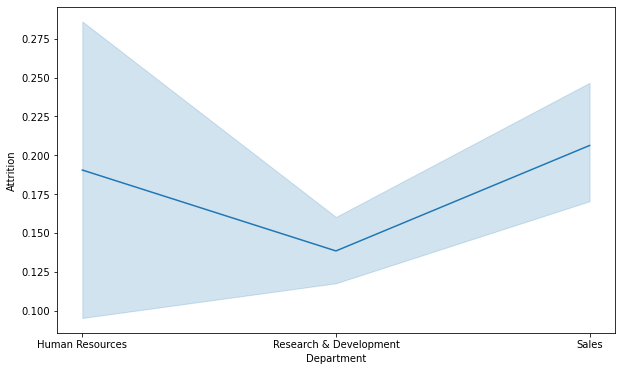

In [91]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Department',y='Attrition',data=df)
plt.show()

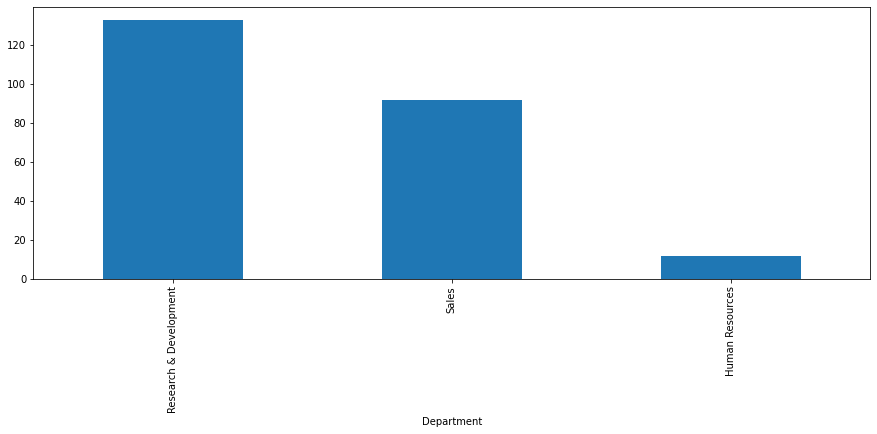

In [92]:
df.groupby("Department")["Attrition"].sum().sort_values(ascending=False).plot(kind="bar",figsize=(15,5))

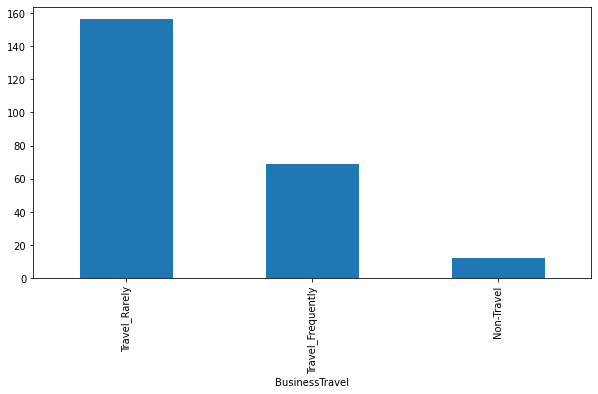

In [93]:
df.groupby("BusinessTravel")["Attrition"].sum().sort_values(ascending=False).plot(kind="bar",figsize=(10,5))

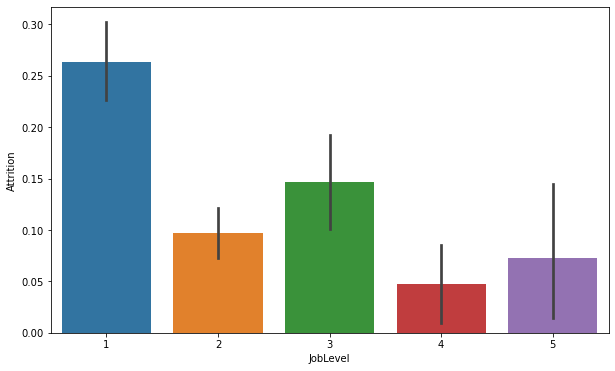

In [94]:
plt.figure(figsize=(10,6))
sns.barplot(x='JobLevel',y='Attrition',data=df)
plt.show()

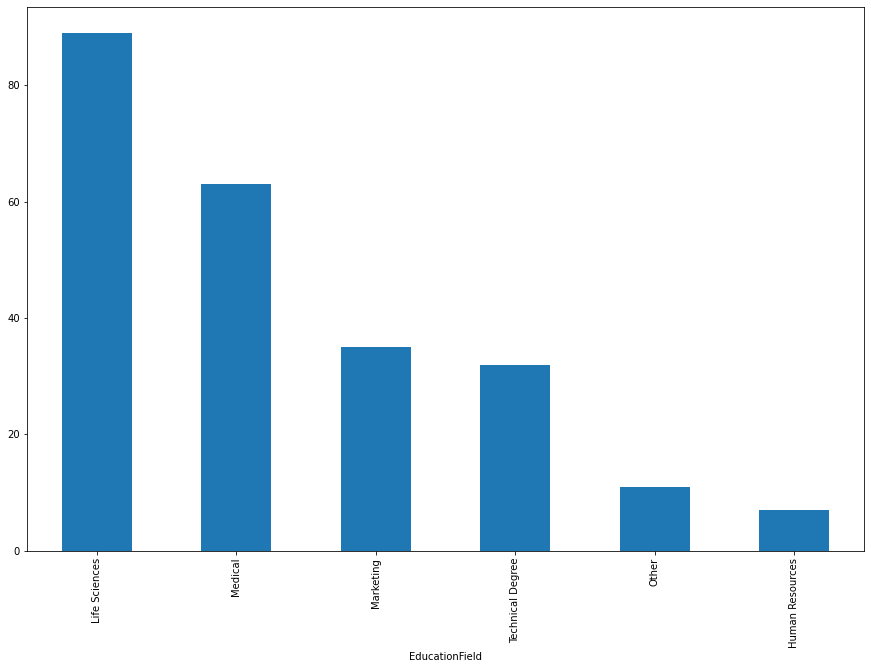

In [95]:
df.groupby("EducationField")["Attrition"].sum().sort_values(ascending=False).plot(kind="bar",figsize=(15,10))

In [96]:
df['Department'] = l.fit_transform(df['Department'])

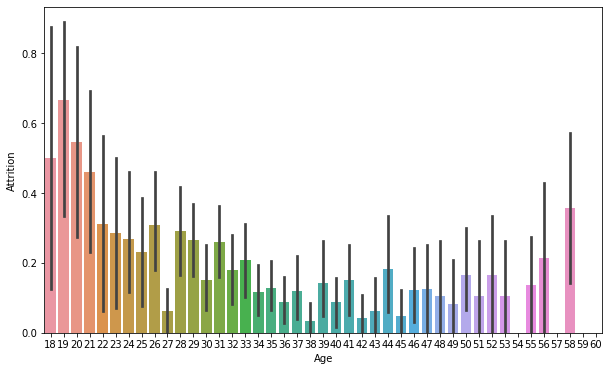

In [97]:
plt.figure(figsize=(10,6))
sns.barplot(x='Age',y='Attrition',data=df)
plt.show()

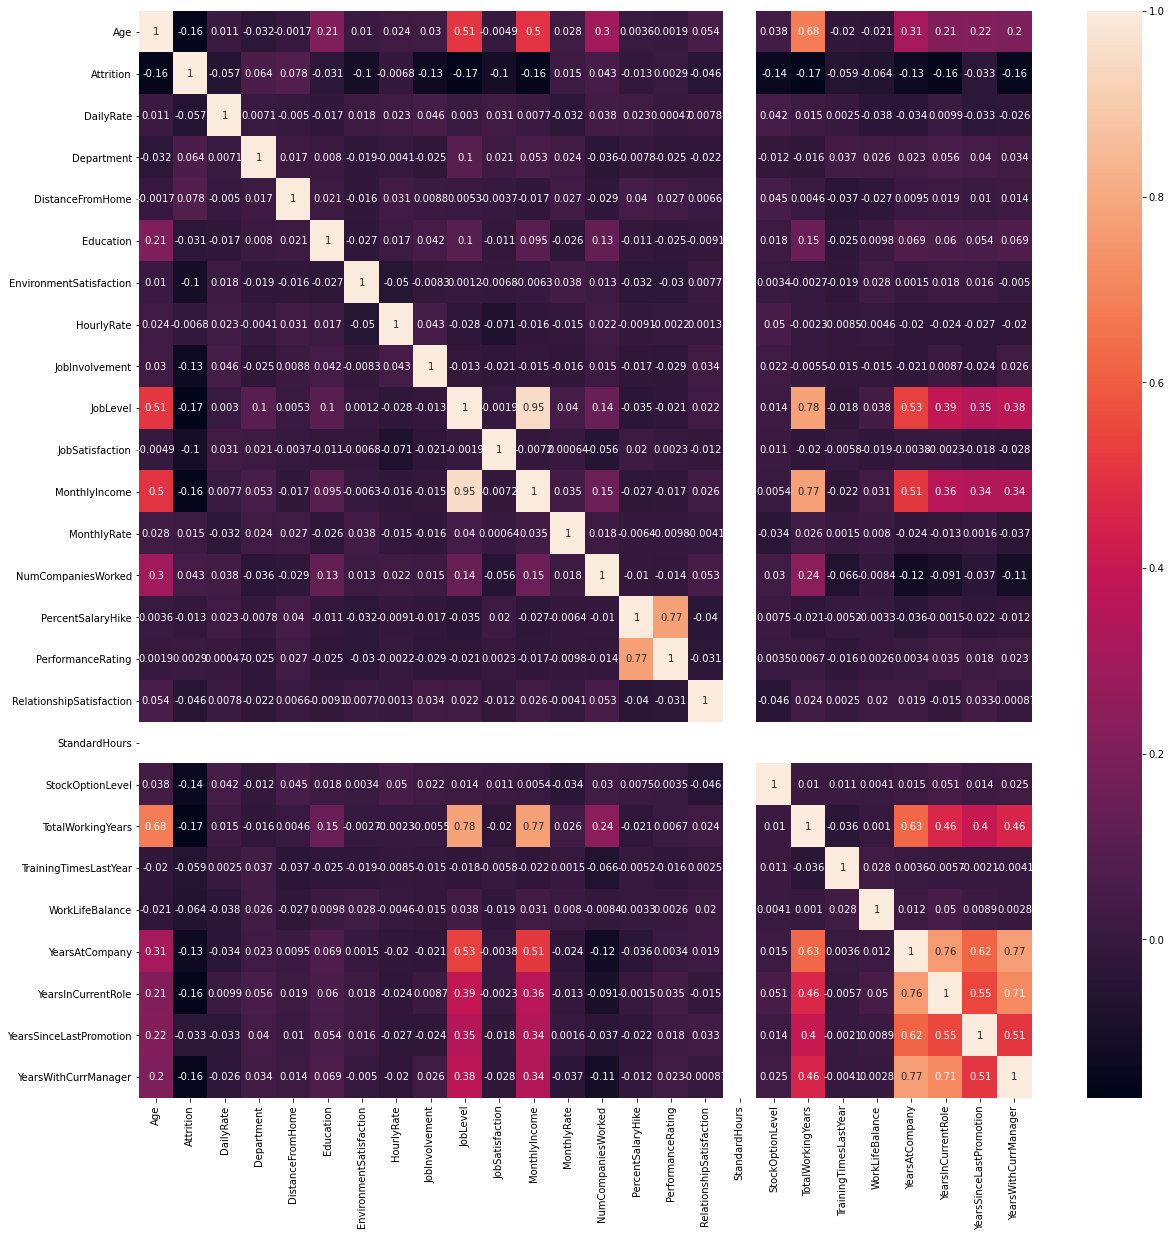

In [98]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

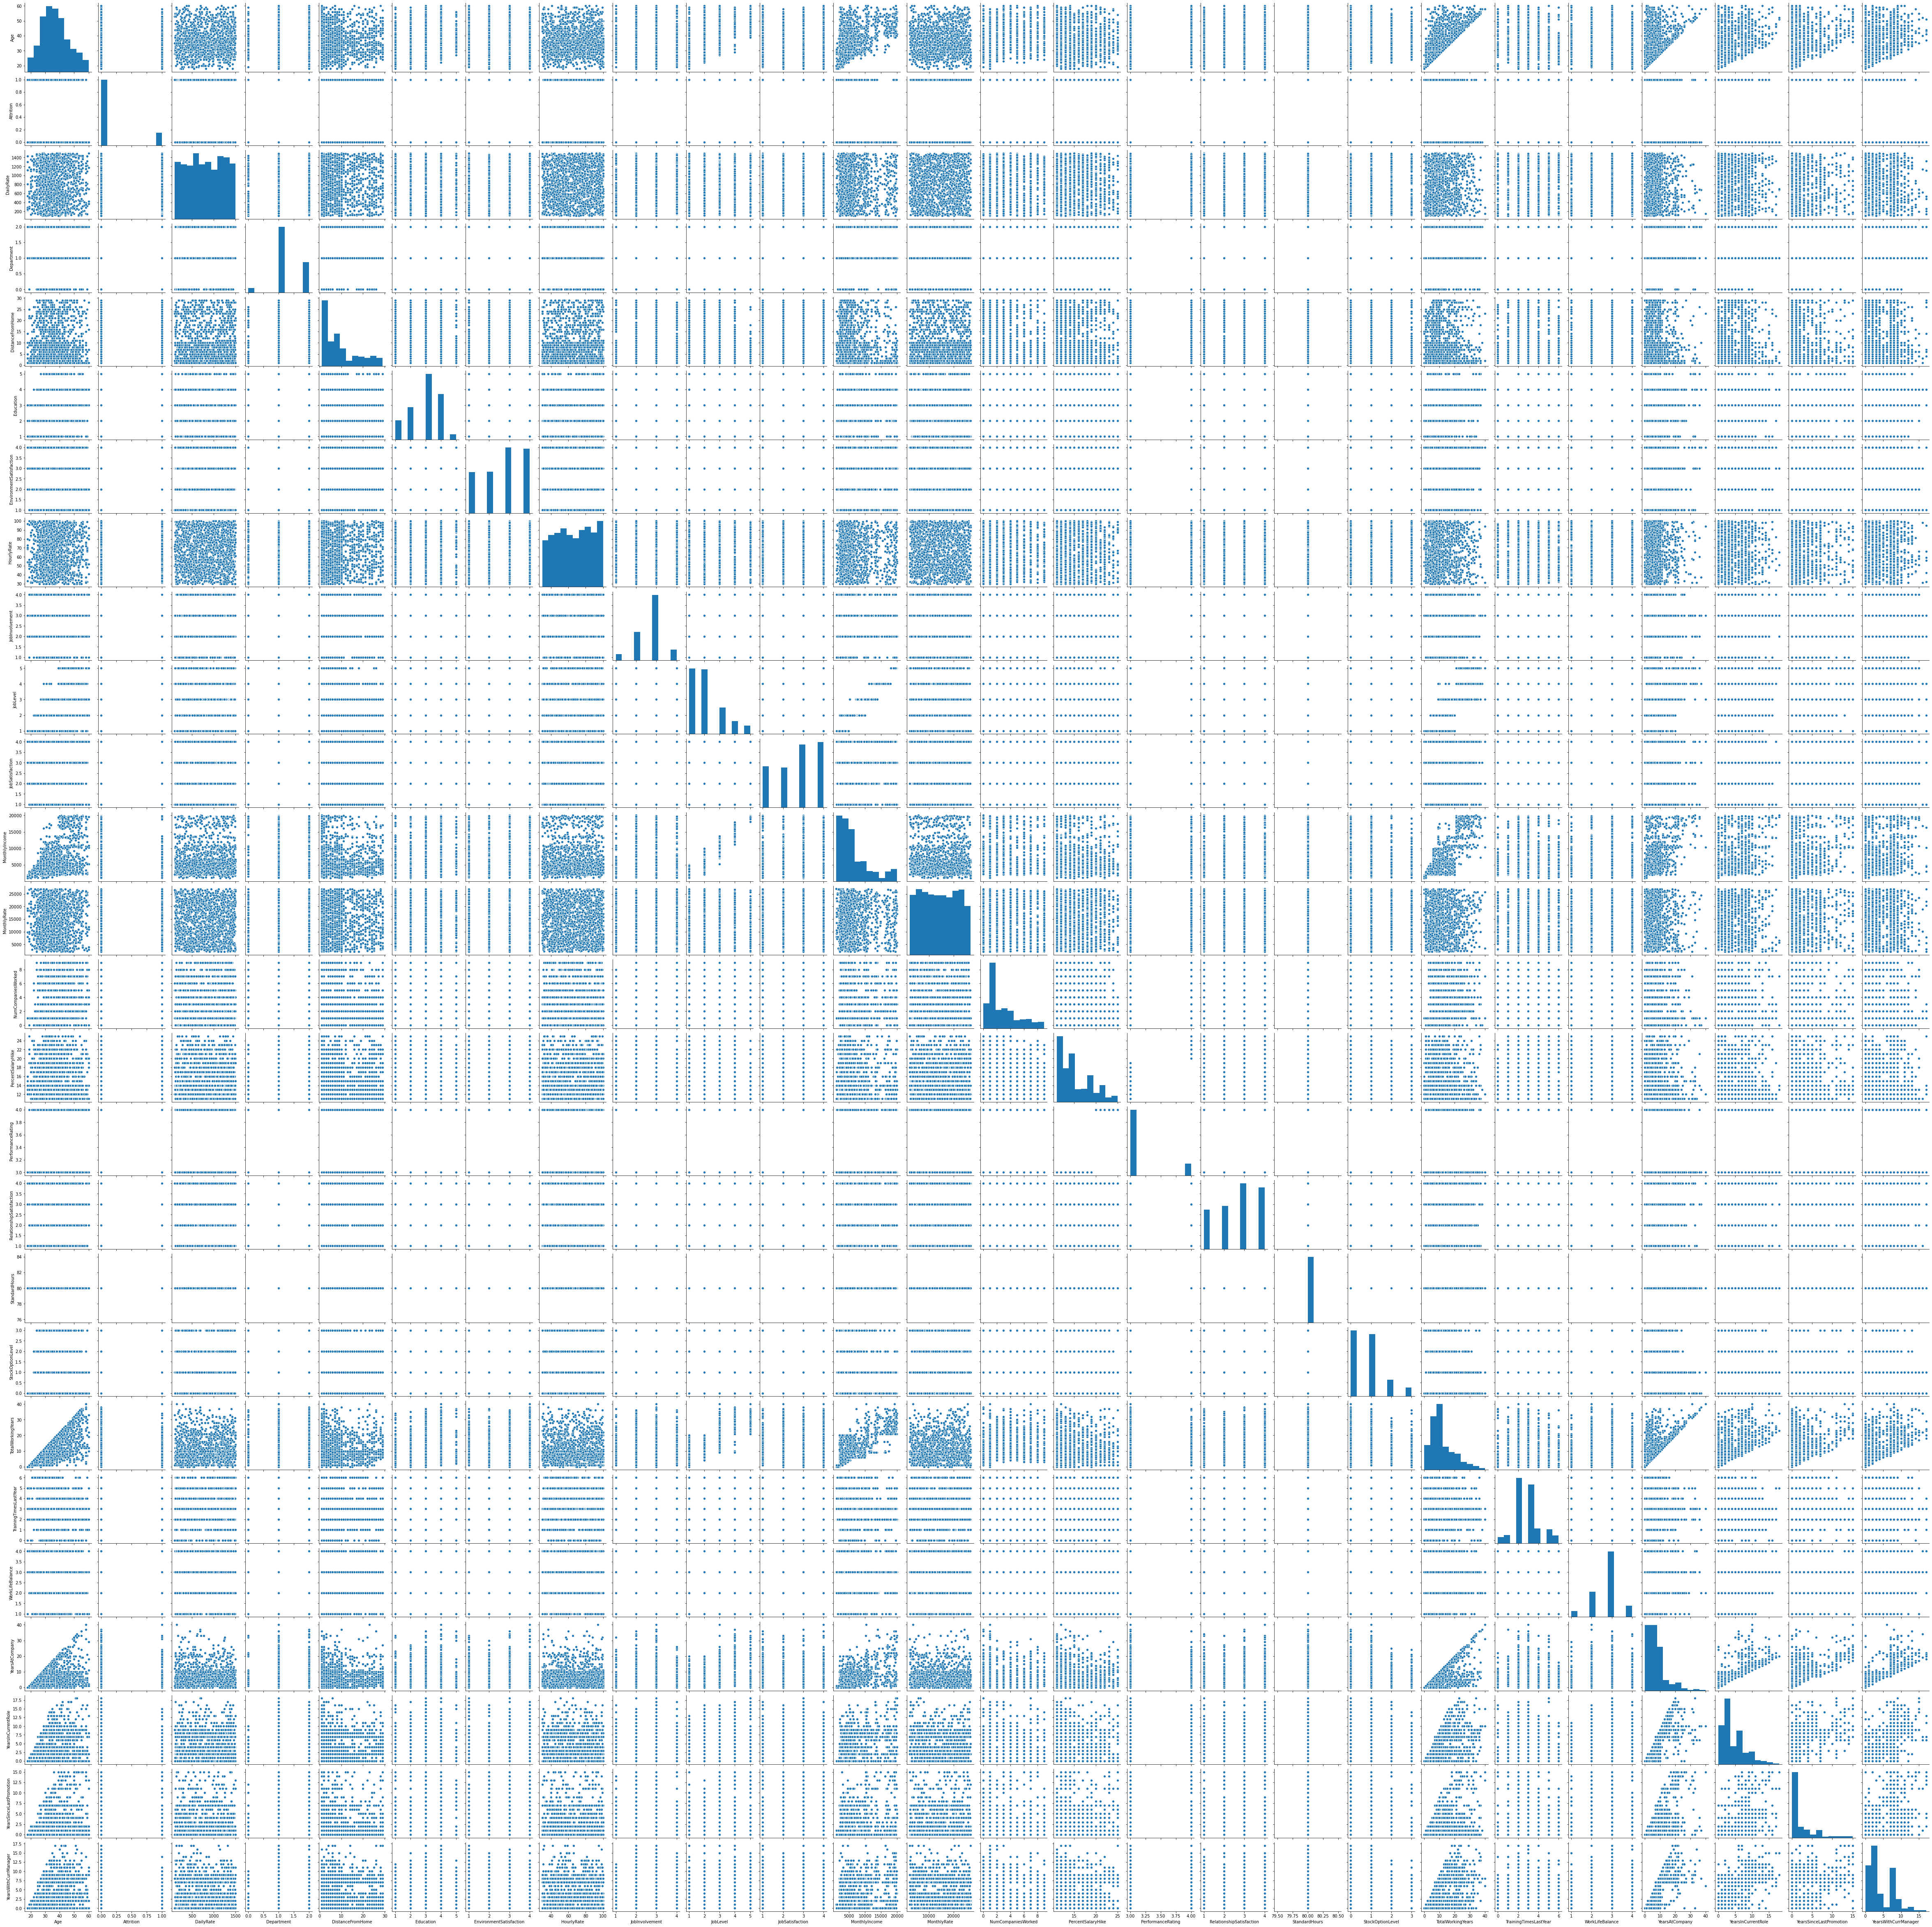

In [99]:
sns.pairplot(df)

In [111]:
df['JobRole'] = l.fit_transform(df['JobRole'])
df['MaritalStatus'] = l.fit_transform(df['MaritalStatus'])
df['OverTime'] = l.fit_transform(df['OverTime'])
df['BusinessTravel'] = l.fit_transform(df['BusinessTravel'])
df['Gender'] = l.fit_transform(df['Gender'])
df["EducationField"]=l.fit_transform(df["EducationField"])

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int32
 2   BusinessTravel            1470 non-null   int64
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int32
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int64
 8   EnvironmentSatisfaction   1470 non-null   int64
 9   Gender                    1470 non-null   int64
 10  HourlyRate                1470 non-null   int64
 11  JobInvolvement            1470 non-null   int64
 12  JobLevel                  1470 non-null   int64
 13  JobRole                   1470 non-null   int64
 14  JobSatisfaction           1470 non-null 

In [113]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [114]:
X = df.drop('Attrition', axis = 1)
Y = df['Attrition']
Y = Y.values.reshape(-1,1)
Y.shape

(1470, 1)

In [115]:
bestfeatures = SelectKBest(score_func = chi2, k = 10)
fit = bestfeatures.fit(X,Y)


In [116]:
scores = pd.DataFrame(fit.scores_)
columns = pd.DataFrame(X.columns)

In [117]:
featureScores = pd.concat([columns, scores], axis = 1)
featureScores.columns = ['features', 'Score']
featureScores

features          Score
0                        Age      84.155277
1             BusinessTravel       0.000002
2                  DailyRate     956.580494
3                 Department       1.329297
4           DistanceFromHome      63.772142
5                  Education       0.520642
6             EducationField       0.834912
7    EnvironmentSatisfaction       6.890594
8                     Gender       0.510087
9                 HourlyRate       0.431779
10            JobInvolvement       4.605616
11                  JobLevel      24.939242
12                   JobRole       9.004448
13           JobSatisfaction       7.011947
14             MaritalStatus      18.745657
15             MonthlyIncome  127922.293694
16               MonthlyRate    1196.633553
17        NumCompaniesWorked       6.438654
18                  OverTime      63.845067
19         PercentSalaryHike       0.235027
20         PerformanceRating       0.000506
21  RelationshipSatisfaction       1.332333
22             StandardHours       0.000000
23          StockOptionLevel      25.268826
24         TotalWorkingYears     230.721618
25     TrainingTimesLastYear       3.085796
26           WorkLifeBalance       1.085543
27            YearsAtCompany     142.100054
28        YearsInCurrentRole     117.522596
29   YearsSinceLastPromotion       7.601723
30      YearsWithCurrManager     110.671534

In [118]:
print(featureScores.nlargest(10, 'Score'))

                features          Score
15         MonthlyIncome  127922.293694
16           MonthlyRate    1196.633553
2              DailyRate     956.580494
24     TotalWorkingYears     230.721618
27        YearsAtCompany     142.100054
28    YearsInCurrentRole     117.522596
30  YearsWithCurrManager     110.671534
0                    Age      84.155277
18              OverTime      63.845067
4       DistanceFromHome      63.772142


In [119]:
X = df[['MonthlyIncome', 'MonthlyRate', 'DailyRate', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager', 'Age', 'OverTime', 'DistanceFromHome']]
X

MonthlyIncome  MonthlyRate  DailyRate  TotalWorkingYears  \
0              5993        19479       1102                  8   
1              5130        24907        279                 10   
2              2090         2396       1373                  7   
3              2909        23159       1392                  8   
4              3468        16632        591                  6   
...             ...          ...        ...                ...   
1465           2571        12290        884                 17   
1466           9991        21457        613                  9   
1467           6142         5174        155                  6   
1468           5390        13243       1023                 17   
1469           4404        10228        628                  6   

      YearsAtCompany  YearsInCurrentRole  YearsWithCurrManager  Age  OverTime  \
0                  6                   4                     5   41         1   
1                 10                   7                     7   49         0   
2                  0                   0                     0   37         1   
3                  8                   7                     0   33         1   
4                  2                   2                     2   27         0   
...              ...                 ...                   ...  ...       ...   
1465               5                   2                     3   36         0   
1466               7                   7                     7   39         0   
1467               6                   2                     3   27         1   
1468               9                   6                     8   49         0   
1469               4                   3                     2   34         0   

      DistanceFromHome  
0                    1  
1                    8  
2                    2  
3                    3  
4                    2  
...                ...  
1465                23  
1466                 6  
1467                 4  
1468                 2  
1469                 8  

[1470 rows x 10 columns]

In [122]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X))
X

0         1         2         3         4         5         6  \
0    -0.108350  0.726020  0.742527 -0.421642 -0.164613 -0.063296  0.245834   
1    -0.291719  1.488876 -1.297775 -0.164511  0.488508  0.764998  0.806541   
2    -0.937654 -1.674841  1.414363 -0.550208 -1.144294 -1.167687 -1.155935   
3    -0.763634  1.243211  1.461466 -0.421642  0.161947  0.764998 -1.155935   
4    -0.644858  0.325900 -0.524295 -0.678774 -0.817734 -0.615492 -0.595227   
...        ...       ...       ...       ...       ...       ...       ...   
1465 -0.835451 -0.284329  0.202082  0.735447 -0.327893 -0.615492 -0.314873   
1466  0.741140  1.004010 -0.469754 -0.293077 -0.001333  0.764998  0.806541   
1467 -0.076690 -1.284418 -1.605183 -0.678774 -0.164613 -0.615492 -0.314873   
1468 -0.236474 -0.150393  0.546677  0.735447  0.325228  0.488900  1.086895   
1469 -0.445978 -0.574124 -0.432568 -0.678774 -0.491174 -0.339394 -0.595227   

             7         8         9  
0     0.446350  1.591746 -1.010909  
1     1.322365 -0.628241 -0.147150  
2     0.008343  1.591746 -0.887515  
3    -0.429664  1.591746 -0.764121  
4    -1.086676 -0.628241 -0.887515  
...        ...       ...       ...  
1465 -0.101159 -0.628241  1.703764  
1466  0.227347 -0.628241 -0.393938  
1467 -1.086676  1.591746 -0.640727  
1468  1.322365 -0.628241 -0.887515  
1469 -0.320163 -0.628241 -0.147150  

[1470 rows x 10 columns]

In [123]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [124]:
Y_train.shape

(1176, 1)

In [125]:
Y_test.shape

(294, 1)

In [126]:
lr=LogisticRegression()
dtc=DecisionTreeClassifier()
knc=KNeighborsClassifier()
rf=RandomForestClassifier()
svc=SVC()

In [127]:
models=[]
models.append(("LogisticRegression",lr))
models.append(("DecisionTreeCLasifier",dtc))
models.append(("KNeighborsClassifier",knc))
models.append(("RandomForestClassifier",rf))
models.append(("SVC",svc))

In [128]:
# making a loop for model making.
Model=[]
confusionmatrix=[]
Accuracyscore=[]
cr=[]
ae=[]
MSE=[]
rms=[]
for name, model in models:
    print(name)
    model.fit(X_train,Y_train)
    pre=model.predict(X_test)
    model.score(X_train, Y_train)
    print(accuracy_score(Y_test, pre))
    Accuracyscore.append(accuracy_score(Y_test,pre))
    print(confusion_matrix(Y_test, pre))
    confusionmatrix.append(confusion_matrix(Y_test, pre))
    print(classification_report(Y_test, pre))
    cr.append(classification_report(Y_test, pre))
    print('Mean absolute error:', mean_absolute_error(Y_test, pre))
    ae.append((mean_absolute_error(Y_test, pre)))
    print('Mean squared error:', mean_squared_error(Y_test, pre))
    MSE.append((mean_squared_error(Y_test, pre)))
    print("\n")

LogisticRegression
0.8741496598639455
[[254   1]
 [ 36   3]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93       255
           1       0.75      0.08      0.14        39

    accuracy                           0.87       294
   macro avg       0.81      0.54      0.54       294
weighted avg       0.86      0.87      0.83       294

Mean absolute error: 0.12585034013605442
Mean squared error: 0.12585034013605442


DecisionTreeCLasifier
0.7891156462585034
[[227  28]
 [ 34   5]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       255
           1       0.15      0.13      0.14        39

    accuracy                           0.79       294
   macro avg       0.51      0.51      0.51       294
weighted avg       0.77      0.79      0.78       294

Mean absolute error: 0.2108843537414966
Mean squared error: 0.2108843537414966


KNeighborsClassifier
0.8503401360544217
[[245  10]
 [ 34 

# Hence Logistic Regression shows better working than other so we will select Logistic Regression

In [129]:
import pickle

In [130]:
filename = 'Hr_analytics.pkl'
pickle.dump(lr, open(filename, 'wb'))